<a href="https://colab.research.google.com/github/TioHalu/Forest_Fire_Prediction_Colab/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [236]:
df=pd.read_csv('/content/drive/MyDrive/tugas/dataset/weatherHistory.csv')

In [237]:
#data preprocessing
col = ['Formatted Date','Summary','Precip Type','Apparent Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Loud Cover','Pressure (millibars)','Daily Summary']
dfNew = df.drop(col, axis="columns", inplace=True)
dfNew= df.drop(df.index[100:])
dfReal = df.drop(df.index[125:])



In [238]:
model = sm.tsa.arima.ARIMA(dfNew, order=(20,1,10))
result = model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [239]:
forecast = result.forecast(steps=25)

prediksi = result.predict(start=1, end=len(dfNew))

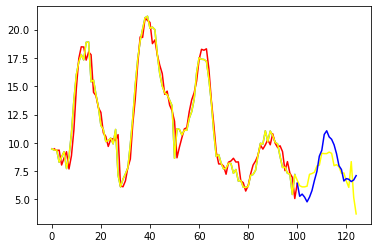

In [240]:
plt.plot(dfNew)
plt.plot(prediksi, color='red')
plt.plot(dfReal, color="yellow")
plt.plot(forecast, color="blue")

In [213]:
from sklearn.metrics import mean_squared_error
dfReal = dfReal.drop(dfReal.index[0:100])
mse = mean_squared_error(dfReal, forecast)
print(f"Mean Squared Error: {mse}")
dfReal


Mean Squared Error: 1.7828229639009772


,Temperature (C)
100,6.688889
101,6.211111
102,6.111111
103,6.111111
104,6.172222
105,7.222222
106,7.288889
107,7.405556
108,7.961111
109,8.033333


In [ ]:
# arr = dfNew.to_numpy()
# arrTanggal = data.to_numpy()
# for i in range(len(arrTanggal)):
#   jumlah = 0
#   pembagi = 0
#   arrayNew = [{"date",,,,,},{"value",,,,}]
#   if arrTanggal[i]==arrTanggal[i+1]:
#     jumlah=jumlah+arr[i]
#     pembagi=+1
#   if arrTanggal[i]!=arrTanggal[i+1]:
#     pembagi == 0
#   mean = jumlah/pembagi
#   arrayNew.append(mean[i], "value")
#   arrayNew.append(date[i],"date")

# arrayNew = [{2-03-2020,3-03-2020},{5,6},{humidity},{windSpeed}]

# print(arr[1])

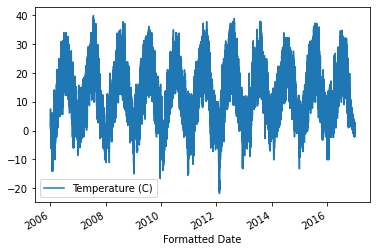

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                               SARIMAX Results                                
Dep. Variable:        Temperature (C)   No. Observations:                96453
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -173218.728
Date:                Tue, 21 Feb 2023   AIC                         346443.456
Time:                        15:14:40   BIC                         346471.887
Sample:                             0   HQIC                        346452.098
                              - 96453                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7026      0.005    128.150      0.000       0.692       0.713
ma.L1         -0.4360      0.006    -74.625      0.000      -0.447      -0.425
sigma2         2.1253      0.003    738.670      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


ValueError: ignored

In [187]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the time series data
df = pd.read_csv('/content/drive/MyDrive/tugas/dataset/weatherHistory.csv', index_col=0, parse_dates=True)
col = ['Summary','Precip Type','Apparent Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Loud Cover','Pressure (millibars)','Daily Summary']
data = df.drop(col, axis="columns")
# Visualize the time series data
data.plot()
plt.show()

# Fit an ARIMA model to the data
model = ARIMA(data, order=(1, 1, 1))
results = model.fit()

# Print the model summary
print(results.summary())

# Make predictions using the model
predictions = results.predict(start=1, end=len(data))

# Visualize the predicted values and the original data
plt.plot(predictions, color='red')
plt.plot(data, color='blue')
plt.show()


